### 参考https://github.com/jianxu305/nCov2019_analysis/tree/master/src

**新型冠状病毒数据分析演示**

新型冠状病毒（2019-nCov) 的疫情牵动着全世界人民的心，而理性地对待离不开数据和分析。为了让人民大众及时了解情况，很多网站都公布疫情的实时信息。比方说[丁香园疫情实时动态](https://ncov.dxy.cn/ncovh5/view/pneumonia)， [腾讯疫情实时追踪](https://news.qq.com/zt2020/page/feiyan.htm) 等等。这些网站的内容都是一样的，它们快速地为公众提供了信息，增加了透明度。但是如果读者希望对疫情有进一步的了解，这些网站就不够用了。比方说，如果你想得到过去十天湖北省确诊人数，那就只能从趋势图上作个估计了。再比方说，如果你想对比一下湖南、广东、浙江三省在过去十天的新增确诊人数，那么单凭网页数据也无能为力了。

为了取得可以供研究使用的数据，[DXY-2019-nCoV-Data](https://github.com/BlankerL/DXY-2019-nCoV-Data) 项目利用网络爬虫不断从网上抓取数据，更新并存成 CSV 格式。然而，这个 CSV 文件包含的是不同时刻网页上的信息片段，有的时候只有这几个城市，有的时候只有那几个城市，数据并不规整。

为了进一步方便用户进行研究，本项目[nCov2019_analysis](https://github.com/jianxu305/nCov2019_analysis) 提供了一些基本工具，把实时数据规整为每日数据，方便用户按时间、省份、城市等方法检索。同时，本项目还提供了基本的时间序列和横向分析作图函数，方便用户取得基本信息。

以下是基本使用方法演示：

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 项目中自定义模块
import sys
sys.path.append('C:/Users/123/Desktop')
import utils

%reload_ext autoreload
%autoreload 2

# 1.数据获取、整理与查看

## 1.1获取csv原始数据

In [14]:
data=utils.load_chinese_data()

最近更新于:  2020-02-09 22:28:25.366000
数据日期范围:  2020-01-24 to 2020-02-09
数据条目数:  28953


In [15]:
data.head(3)  # 查看数据形式

,provinceName,cityName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime,updateDate
0,山东省,青岛,444,0,62,1,49,0,10,1,2020-02-09 22:28:25.366,2020-02-09
1,山东省,济南,444,0,62,1,43,0,7,0,2020-02-09 22:28:25.366,2020-02-09
2,山东省,临沂,444,0,62,1,40,0,7,0,2020-02-09 22:28:25.366,2020-02-09


## 1.2将实时数据合成每日数据

In [16]:
daily_frm = utils.aggDaily(data, clean_data=True)

In [17]:
daily_frm

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate
27963,云南省,丽江市,1,0,0,2020-01-24 23:55:14.973,2020-01-24
27961,云南省,昆明,3,0,0,2020-01-24 23:55:14.973,2020-01-24
27962,云南省,西双版纳州,1,0,0,2020-01-24 23:55:14.973,2020-01-24
28307,内蒙古自治区,满洲里,1,0,0,2020-01-24 13:04:21.168,2020-01-24
28835,北京市,不明地区,8,0,0,2020-01-24 07:37:33.464,2020-01-24
...,...,...,...,...,...,...,...
1131,黑龙江省,绥化,35,1,3,2020-02-09 16:36:17.092,2020-02-09
1132,黑龙江省,鸡西,34,0,0,2020-02-09 16:36:17.092,2020-02-09
1138,黑龙江省,鹤岗,4,1,0,2020-02-09 16:36:17.092,2020-02-09
1140,黑龙江省,黑河,2,0,0,2020-02-09 16:36:17.092,2020-02-09


###  1.2.1用 utils.add_dailyNew() 加入每日新增确诊、死亡、治愈人数

In [18]:
daily_frm = utils.add_dailyNew(daily_frm)

In [19]:
daily_frm[daily_frm['cityName'] == '武汉'][['confirmed', 'dailyNew_confirmed', 'dead', 'dailyNew_dead', 'cured', 'dailyNew_cured', 'updateDate']][:5]

,confirmed,dailyNew_confirmed,dead,dailyNew_dead,cured,dailyNew_cured,updateDate
28165,495,NaN,23,NaN,31,NaN,2020-01-24
26990,572,77.0,38,15.0,32,1.0,2020-01-25
26341,618,46.0,45,7.0,40,8.0,2020-01-26
25162,698,80.0,63,18.0,42,2.0,2020-01-27
24358,1590,892.0,85,22.0,47,5.0,2020-01-28


## 1.3数据查看

### 1.3.1 提取部分信息

#### 1.3.1.1检索省级数据

In [20]:
daily_frm[daily_frm['provinceName'] == '江苏省']

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate,dailyNew_confirmed,dailyNew_dead,dailyNew_cured
28055,江苏省,南京,3,0,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN
28059,江苏省,南通,1,0,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN
28058,江苏省,扬州,1,0,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN
28060,江苏省,无锡,1,0,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN
28056,江苏省,苏州,2,0,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
606,江苏省,淮安,44,5,0,2020-02-09 18:17:46.683,2020-02-09,4.0,0.0,3.0
613,江苏省,盐城,17,3,0,2020-02-09 18:17:46.683,2020-02-09,0.0,0.0,0.0
603,江苏省,苏州,75,11,0,2020-02-09 18:17:46.683,2020-02-09,3.0,0.0,7.0
608,江苏省,连云港,32,4,0,2020-02-09 18:17:46.683,2020-02-09,5.0,0.0,2.0


#### 1.3.1.2检索市级数据

In [22]:
daily_frm[daily_frm['cityName'] == '扬州']

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate,dailyNew_confirmed,dailyNew_dead,dailyNew_cured
28058,江苏省,扬州,1,0,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN
27345,江苏省,扬州,1,0,0,2020-01-25 11:29:42.929,2020-01-25,0.0,0.0,0.0
26298,江苏省,扬州,1,0,0,2020-01-26 16:45:26.835,2020-01-26,0.0,0.0,0.0
25684,江苏省,扬州,4,0,0,2020-01-27 09:10:03.105,2020-01-27,3.0,0.0,0.0
24800,江苏省,扬州,5,0,0,2020-01-28 08:54:50.484,2020-01-28,1.0,0.0,0.0
23857,江苏省,扬州,8,0,0,2020-01-29 09:13:28.914,2020-01-29,3.0,0.0,0.0
22745,江苏省,扬州,8,0,0,2020-01-30 08:50:04.749,2020-01-30,0.0,0.0,0.0
20441,江苏省,扬州,8,0,0,2020-01-31 20:33:59.008,2020-01-31,0.0,0.0,0.0
17930,江苏省,扬州,13,0,0,2020-02-01 21:59:42.526,2020-02-01,5.0,0.0,0.0
16286,江苏省,扬州,13,0,0,2020-02-02 19:43:03.214,2020-02-02,0.0,0.0,0.0


#### 1.3.1.3检索单日数据

In [24]:
daily_frm[daily_frm['updateDate'] == pd.to_datetime('2020-02-08')]

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate,dailyNew_confirmed,dailyNew_dead,dailyNew_cured
4269,上海市,嘉定区,6,1,0,2020-02-08 14:28:29.350,2020-02-08,1.0,0.0,1.0
4257,上海市,外地来沪人员,96,20,1,2020-02-08 14:28:29.350,2020-02-08,3.0,0.0,6.0
4265,上海市,奉贤区,9,1,0,2020-02-08 14:28:29.350,2020-02-08,0.0,0.0,1.0
4259,上海市,宝山区,17,0,0,2020-02-08 14:28:29.350,2020-02-08,1.0,0.0,0.0
4273,上海市,崇明区,2,0,0,2020-02-08 14:28:29.350,2020-02-08,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3740,黑龙江省,绥化,44,1,2,2020-02-08 16:32:08.225,2020-02-08,5.0,0.0,0.0
3742,黑龙江省,鸡西,31,0,0,2020-02-08 16:32:08.225,2020-02-08,2.0,0.0,0.0
3748,黑龙江省,鹤岗,3,0,0,2020-02-08 16:32:08.225,2020-02-08,1.0,0.0,0.0
3750,黑龙江省,黑河,2,0,0,2020-02-08 16:32:08.225,2020-02-08,1.0,0.0,0.0


# 2.可视化对比

## 2.1时序比较图 utils.tsplot_conf_dead_cured()

### 2.1.1全国累计确诊、每日新增确诊、死亡、治愈时间序列图

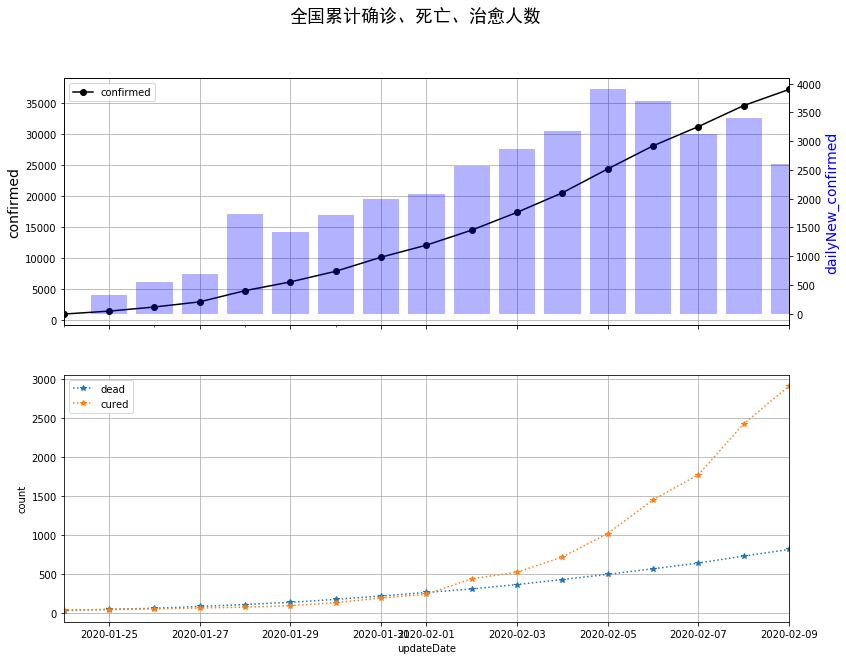

In [37]:
fig = utils.tsplot_conf_dead_cured(daily_frm, title_prefix='全国')
plt.show()

### 2.1.2单个省份的时间序列示例

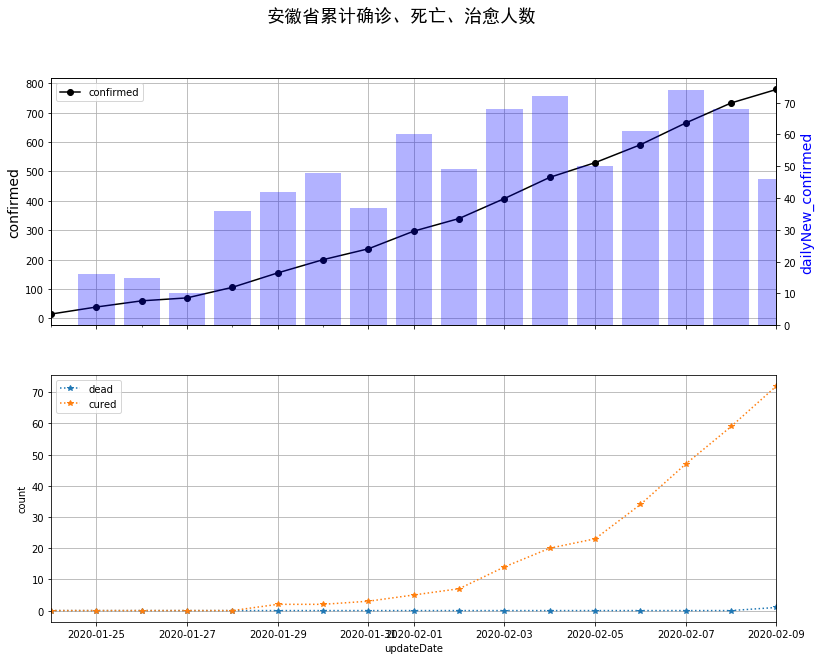

In [38]:
province = '安徽省'   # 输入你所要的省份
fig = utils.tsplot_conf_dead_cured(daily_frm[daily_frm['provinceName'] == province], title_prefix=province)
plt.show()   

### 2.1.3单个城市的时间序列示例，（使用 logy=True 画指数图，看人数是否指数增长）

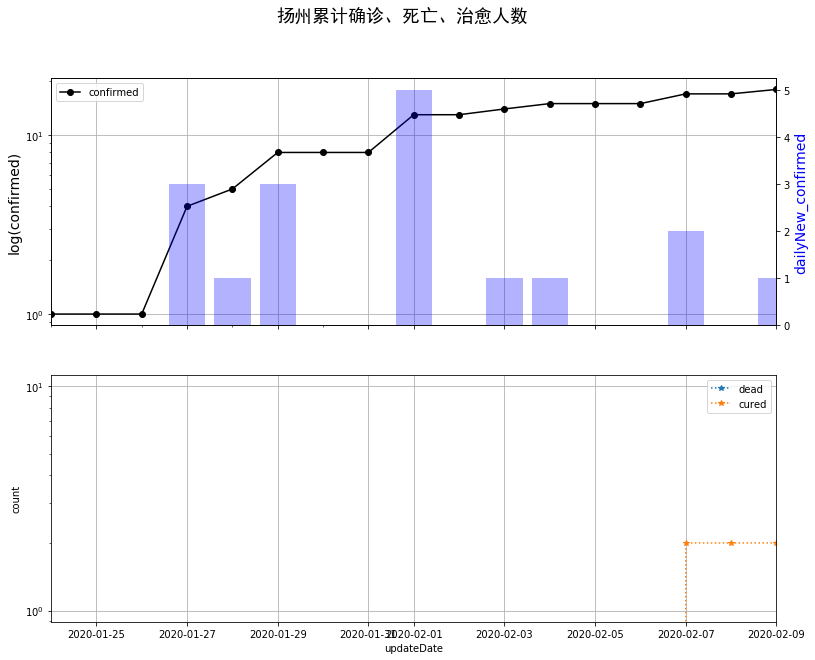

In [40]:
city = '扬州'
fig = utils.tsplot_conf_dead_cured(daily_frm[daily_frm['cityName'] == city], title_prefix=city, logy=True)
plt.show() 

## 2.2横向对比图utils.cross_sectional_bar()

### 2.2.1各省份在2月8号确诊数比较

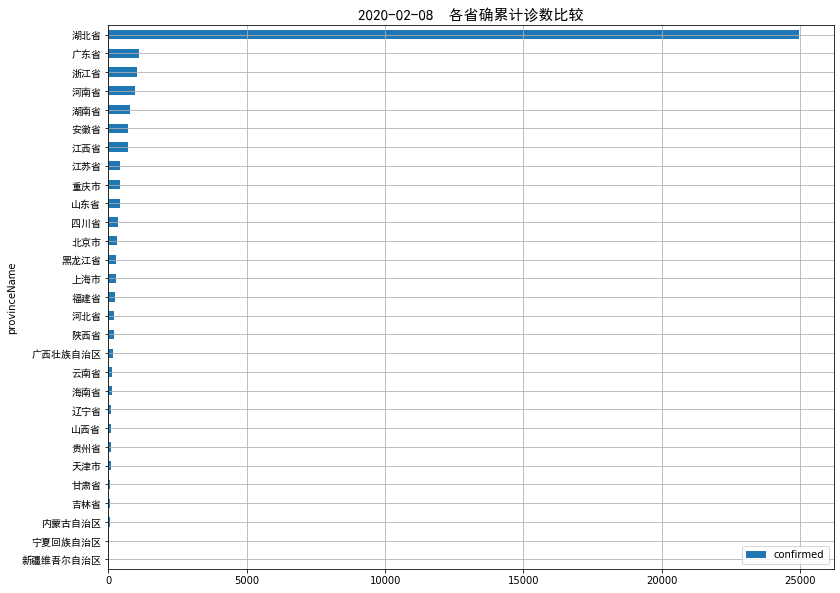

In [42]:
utils.cross_sectional_bar(daily_frm, '2020-02-08', col='confirmed', groupby='provinceName', title='各省确累计诊数比较')

### 2.2.2某省份各地某天死亡数比较

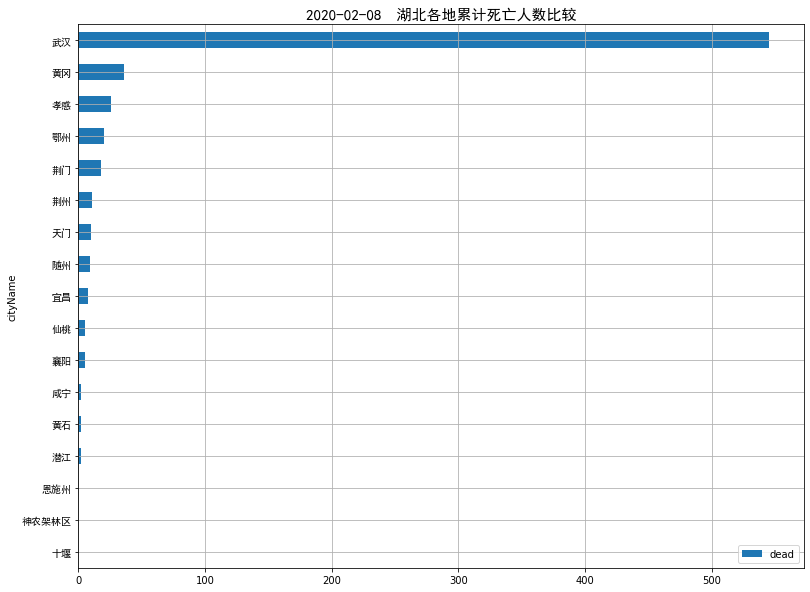

In [43]:
utils.cross_sectional_bar(daily_frm[daily_frm['provinceName'] == '湖北省'], '2020-02-08', col='dead', 
                        groupby='cityName', title='湖北各地累计死亡人数比较')

### 2.2.3全国2月8日新增确诊最多的十个城市 （用 largestN 参数限制横条数目）

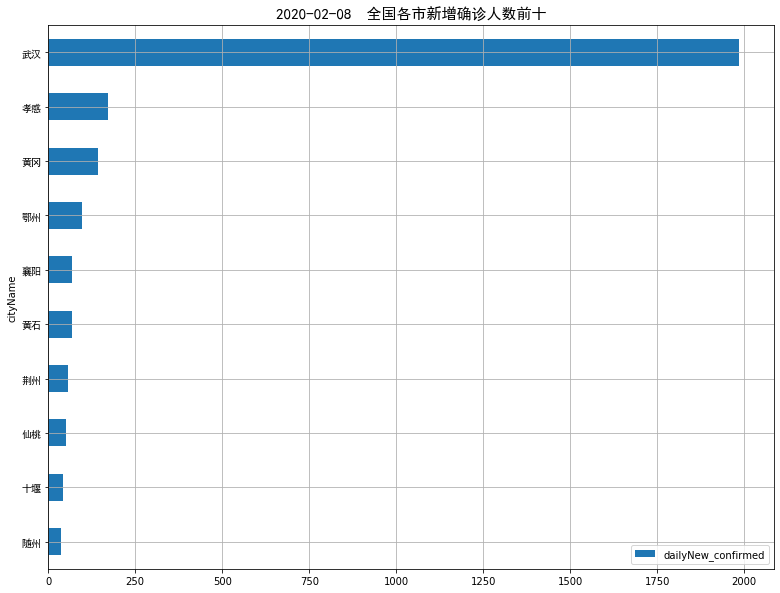

In [44]:
utils.cross_sectional_bar(daily_frm, '2020-02-08', col='dailyNew_confirmed', 
                        groupby='cityName', title='全国各市新增确诊人数前十', largestN=10)

# 3.武汉 - 湖北（除武汉外） - 湖北以外 疫情的特异性分析对比

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.font_manager as mfm

# 项目中自定义模块
import sys
sys.path.append('C:/Users/123/Desktop')
import utils

%reload_ext autoreload
%autoreload 2

In [46]:
# 获取最新实时数据
data = utils.load_chinese_data()

最近更新于:  2020-02-09 23:00:53.855000
数据日期范围:  2020-01-24 to 2020-02-09
数据条目数:  28988


In [47]:
# 合成每日数据
daily_frm = utils.aggDaily(data)

## 3.1把数据分成 武汉 -- 湖北（除武汉） -- 全国（除湖北） 三个区域各自整合

In [48]:
wuhan = daily_frm[daily_frm['cityName'] == '武汉'].groupby('updateDate').agg('sum')
hubei_exWuhan = daily_frm[(daily_frm['provinceName'] == '湖北省') & (daily_frm['cityName'] != '武汉')].groupby('updateDate').agg('sum')
china_exHubei = daily_frm[daily_frm['provinceName'] != '湖北省'].groupby('updateDate').agg('sum')

contrast_frm = pd.merge(wuhan.add_suffix('_Wuhan'), hubei_exWuhan.add_suffix('_Hubei_exWuhan'), 'left', on='updateDate')
contrast_frm = pd.merge(contrast_frm, china_exHubei.add_suffix('_China_exHubei'), 'left', on='updateDate')

## 3.2画图比较确诊人数和死亡人数

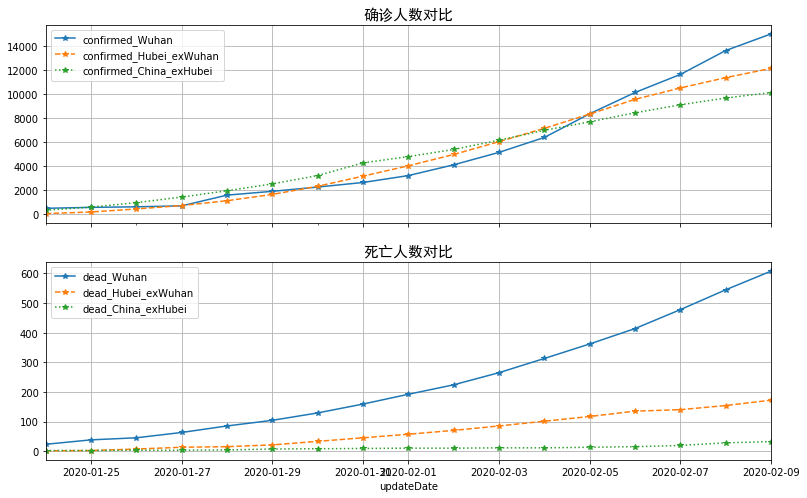

In [49]:
locations = ('Wuhan', 'Hubei_exWuhan', 'China_exHubei')
fig = plt.figure()
ax1 = fig.add_subplot(211)
contrast_frm.plot(y=['confirmed_' + suffix for suffix in locations], grid=True, figsize=(13, 8), style=['-*', '--*', ':*'], ax=ax1)
ax1.set_title('确诊人数对比', fontproperties=utils._FONT_PROP_, fontsize=15)
ax2 = fig.add_subplot(212)
contrast_frm.plot(y=['dead_' + suffix for suffix in locations], grid=True, figsize=(13, 8), style=['-*', '--*', ':*'], ax=ax2, sharex=True)
ax2.set_title('死亡人数对比', fontproperties=utils._FONT_PROP_, fontsize=15)
plt.show()

**从上图可以看出**

虽然武汉，湖北除武汉，全国除湖北三个区域的确诊人数接近，但是死亡人数却有极大的差异：

武汉 >> 湖北除武汉 >> 全国除湖北

这是为什么呢？

我们定义一个“简单死亡率” (Simple Death Rate)

### 3.2.1添加“简单死亡率” (Simple Death Rate) = 死亡数 / 确诊数

In [50]:
for loc in locations:
    contrast_frm['simpleDeathRate_' + loc] = contrast_frm['dead_' +
                                                          loc] / contrast_frm['confirmed_' + loc]

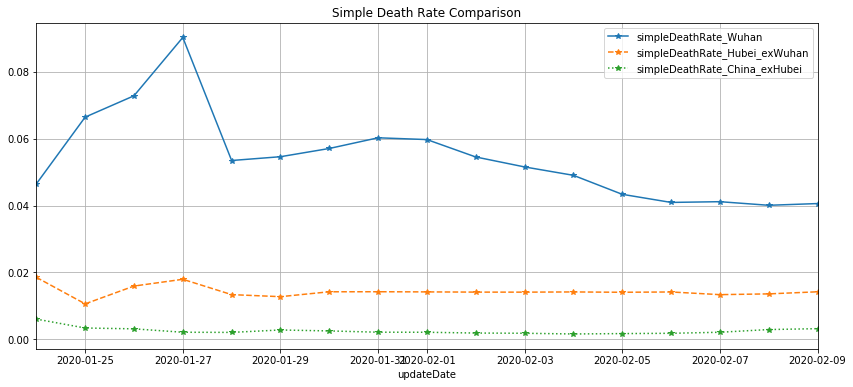

In [51]:
contrast_frm.plot(y=['simpleDeathRate_' + loc for loc in locations], grid=True, figsize=(14, 6), style=['-*', '--*', ':*'],
                  title='Simple Death Rate Comparison')

**从上图可以看出**

武汉死亡率 > 湖北（除武汉外）死亡率 > 全国其他地区死亡率

这说明武汉死亡人数高不是因为确诊人数多造成的。

但是我们知道，死亡人数应该比确诊人数有个滞后，会不会是这个滞后造成计算不准确呢？

### 3.2.2考虑死亡人数与确诊人数的滞后效应

In [52]:
def lagDeathRate(df, location, lag=5):
    return np.mean(df['dead_' + location][lag:].to_numpy() / df['confirmed_' + location][:-lag].to_numpy())

In [53]:
print('延迟死亡率')
print('武汉：', "{:.2%}".format(lagDeathRate(contrast_frm, 'Wuhan')))
print('湖北（除武汉）：', "{:.2%}".format(lagDeathRate(contrast_frm, 'Hubei_exWuhan')))
print('全国（除湖北）：', "{:.2%}".format(lagDeathRate(contrast_frm, 'China_exHubei')))

延迟死亡率
武汉： 16.42%
湖北（除武汉）： 8.75%
全国（除湖北）： 0.69%


可见死亡统计的延迟效应并不影响

武汉死亡率 > 湖北（除武汉外）死亡率 > 全国其他地区死亡率

的结论。

**那么是不是医疗系统饱和造成武汉、湖北死亡率高呢？**